In [1]:
# Загружаем наш датасет и необходимые для работы библиотеки. Данный датасет представляет из себя набор переменных для определния качества вина. На выходе имеем 1599 значений на 11 переменных.

In [2]:
# Устанавливаем все необходимые библиотеки для начала работы.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загружаем наш датасет
mk = pd.read_csv('vino.csv', sep=',')

In [4]:
mk

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Проводим логарифмированние данных для некоторых переменных, а именно 'volatileacidity', 'residualsugar','chlorides', 'freesulfurdioxide', 'sulphates'.
mk_1 = mk.copy()
mk_1[['volatileacidity', 'residualsugar','chlorides', 'freesulfurdioxide', 'sulphates']] = np.log(mk_1[['volatileacidity', 'residualsugar','chlorides', 'freesulfurdioxide', 'sulphates']])

In [6]:
# Смотрим статистику нашего датасета
mk_1.describe()

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,-0.698517,0.850232,-2.505462,2.546132,46.467792,1.002994,3.311113,-0.445260,10.422983,5.636023
std,1.741096,0.353683,0.357443,0.327215,0.685292,32.895324,0.035567,0.154386,0.223566,1.065668,0.807569
min,4.600000,-2.120264,-0.105361,-4.422849,0.000000,6.000000,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,-0.941609,0.641854,-2.659260,1.945910,22.000000,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,-0.653926,0.788457,-2.538307,2.639057,38.000000,0.996750,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,-0.446287,0.955511,-2.407946,3.044522,62.000000,0.997835,3.400000,-0.314711,11.100000,6.000000
max,15.900000,0.457425,2.740840,-0.492658,4.276666,289.000000,1.202600,4.010000,0.693147,14.900000,8.000000


In [7]:
# Проверяем наш дата сет на наличие выбросов и избавляемся от них.
def outliers(mk_1):
    num_var = list(mk_1._get_numeric_data().columns)
    for col_names in num_var:
        mk_1[col_names] = mk_1[col_names].apply(lambda y: mk_1[col_names].mean()-3*mk_1[col_names].std() 
                            if y < mk_1[col_names].mean()-3*mk_1[col_names].std() else y)
        mk_1[col_names] = mk_1[col_names].apply(lambda y: mk_1[col_names].mean()+3*mk_1[col_names].std() 
                            if y > mk_1[col_names].mean()+3*mk_1[col_names].std() else y)
    return(mk_1)

In [8]:
# Повторно смотрим на статистику датасета. Как итог, после преобразований ничего не изменилось, что означает, что выбросов не было
mk_1 = outliers(mk_1)
mk_1.describe()

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.310203,-0.697812,0.843740,-2.513960,2.547052,46.240967,1.000150,3.310671,-0.447287,10.420519,5.637357
std,1.707609,0.350810,0.332102,0.280725,0.682194,31.822634,0.019763,0.152316,0.215819,1.057458,0.803377
min,4.600000,-1.759565,-0.105361,-3.487107,0.490257,6.000000,0.990070,2.847954,-1.108663,8.400000,3.213314
25%,7.100000,-0.941609,0.641854,-2.659260,1.945910,22.000000,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,-0.653926,0.788457,-2.538307,2.639057,38.000000,0.996750,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,-0.446287,0.955511,-2.407946,3.044522,62.000000,0.997835,3.400000,-0.314711,11.100000,6.000000
max,13.542926,0.355286,1.922562,-1.538341,4.276666,145.153766,1.109694,3.773661,0.225440,13.619986,8.000000


In [9]:
mk_1

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,-0.356675,0.641854,-2.577022,2.397895,34.0,0.99780,3.51,-0.579818,9.4,5.0
1,7.8,-0.127833,0.955511,-2.322788,3.218876,67.0,0.99680,3.20,-0.385662,9.8,5.0
2,7.8,-0.274437,0.832909,-2.385967,2.708050,54.0,0.99700,3.26,-0.430783,9.8,5.0
3,11.2,-1.272966,0.641854,-2.590267,2.833213,60.0,0.99800,3.16,-0.544727,9.8,6.0
4,7.4,-0.356675,0.641854,-2.577022,2.397895,34.0,0.99780,3.51,-0.579818,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,-0.510826,0.693147,-2.407946,3.465736,44.0,0.99490,3.45,-0.544727,10.5,5.0
1595,5.9,-0.597837,0.788457,-2.780621,3.663562,51.0,0.99512,3.52,-0.274437,11.2,6.0
1596,6.3,-0.673345,0.832909,-2.577022,3.367296,40.0,0.99574,3.42,-0.287682,11.0,6.0
1597,5.9,-0.438505,0.693147,-2.590267,3.465736,44.0,0.99547,3.57,-0.342490,10.2,5.0


In [10]:
# Строим корреляционную матрциу. Наиболее коррелируемым фактором является Alcohol.
mk_1.corr ()

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.271184,0.182490,0.201563,-0.181393,-0.115178,0.403106,-0.686715,0.209557,-0.067241,0.126220
volatileacidity,-0.271184,1.000000,0.047168,0.141110,0.034347,0.103420,-0.035945,0.226791,-0.305939,-0.227692,-0.390136
residualsugar,0.182490,0.047168,1.000000,0.151468,0.081203,0.175020,0.218673,-0.085042,0.032135,0.095763,0.026316
chlorides,0.201563,0.141110,0.151468,1.000000,-0.012591,0.081130,0.081778,-0.272293,0.174557,-0.317810,-0.179974
freesulfurdioxide,-0.181393,0.034347,0.081203,-0.012591,1.000000,0.686343,-0.038988,0.097947,0.051836,-0.085787,-0.051029
totalsulfurdioxide,-0.115178,0.103420,0.175020,0.081130,0.686343,1.000000,0.004509,-0.058916,0.005184,-0.225014,-0.202365
density,0.403106,-0.035945,0.218673,0.081778,-0.038988,0.004509,1.000000,-0.174672,0.064736,-0.070503,-0.002736
pH,-0.686715,0.226791,-0.085042,-0.272293,0.097947,-0.058916,-0.174672,1.000000,-0.137249,0.200982,-0.059028
sulphates,0.209557,-0.305939,0.032135,0.174557,0.051836,0.005184,0.064736,-0.137249,1.000000,0.145731,0.323993
alcohol,-0.067241,-0.227692,0.095763,-0.317810,-0.085787,-0.225014,-0.070503,0.200982,0.145731,1.000000,0.480123


In [11]:
# Делим наш дата сет на обучающую и тестовую выборку
X = mk_1.iloc[:, :-1].values
y = mk_1.iloc[:, 10].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
# Строим простую линейную регрессию зависимости от одного фактора (Alcohol)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 9:10], y_train)

In [13]:
# Оцениваем полученные параметры
sr.coef_, sr.intercept_

(array([0.35406095]), 1.9418000076424669)

In [14]:
# Делаем прогноз 
y_pred = sr.predict(X_test[:, 9:10])

In [15]:
# Проверяем кэф. детерминации, который равен 0.21 для обучающей и 0.27 для тестовой , что является совсем маленьким значением доверия.
sr.score(X_train[:, 9:10], y_train), sr.score(X_test[:, 9:10], y_test)

(0.21683585831360253, 0.2730477411587453)

In [16]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 9:10])), mean_squared_error(y_test, y_pred)

(0.49124331134100235, 0.5174525158499793)

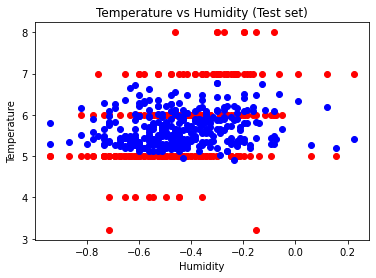

In [17]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что простая линейная регрессия описывает модель не точно.
plt.scatter(X_test[:,8], y_test, color = 'red')
plt.plot(X_test[:,8], sr.predict(X_test[:, 9:10]), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [18]:
# Множественная регрессия. Проверяем P value - делаем выводы , что все переменные значимые и будем использовать их как основу.
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     71.73
Date:                Sat, 19 Dec 2020   Prob (F-statistic):          4.24e-116
Time:                        10:48:08   Log-Likelihood:                -1229.9
No. Observations:                1279   AIC:                             2482.
Df Residuals:                    1268   BIC:                             2538.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8517      1.052      3.660      0.000       1.787       5.916
x1             0.0031      0.017      0.189      0.850      -0.029       0.036
x2            -0.4723      0.058     -8.106      0.000      -0.587      -0.358
x3             0.0142      0.058      0.245      0.807      -0.100       0.128
x4            -0.2624      0.073     -3.585      0.000      -0.406      -0.119
x5             0.1149      0.037      3.064      0.002       0.041       0.188
x6            -0.0048      0.001     -5.811      0.000      -0.006      -0.003
x7            -0.1869      0.981     -0.191      0.849      -2.110       1.737
x8            -0.4499      0.172     -2.621      0.009      -0.787      -0.113
x9             0.7388      0.089      8.320      0.000       0.565       0.913
x10            0.2578      0.020     13.096      0.000       0.219       0.296
==============================================================================
Omnibus:                       13.609   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.810
Skew:                          -0.132   Prob(JB):                     0.000136
Kurtosis:                       3.515   Cond. No.                     4.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Определяем значимые переменные с погрешностью 5%.
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [20]:
X_train = X_train[:, [1, 3, 5, 8, 9]]
X_test = X_test[:, [1, 3, 5, 8, 9]]

In [21]:
# Строим множественную регрессию на обучающейся выборке.
mr = LinearRegression().fit(X_train, y_train)

In [22]:
# Получаем и оцениваем параметры.
mr.coef_, mr.intercept_

(array([-0.53016525, -0.2079541 , -0.00302108,  0.75702079,  0.25122001]),
 2.5963171943634995)

In [23]:
# Строим прогноз.
y_pred = mr.predict(X_test)

In [24]:
# Проверяем кэф. детерминации, который равен 0.35 для обучающей и 0.37 для тестоовой, лучше чем в моделе однофактороной регрессии, но по прежнему низкий.
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.3518722609184505, 0.3744116013624319)

In [25]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой. Ошибка меньше в сравнении с однофакторной регрессией.
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.4065411064822091, 0.44530061888460093)

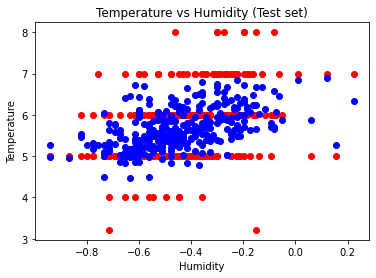

In [26]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что множественная линейная регрессия описывает модель немного лучше, чем однофакторная, однако точность построения модели всё так же не удовлетворительное.
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], mr.predict(X_test), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [27]:
# Построим полиномиальную регрессию для нашего датасета.
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [28]:
# Получаем и оцениваем параметры
pr.coef_, pr.intercept_

(array([-3.72453294e-02, -2.94678270e-01, -1.09818583e-02, -4.22585718e-01,
         5.05344854e-01, -4.59421306e-01,  4.78350392e-01,  6.45099649e-03,
        -4.02861895e-02, -2.05325447e-02, -1.34026221e-01, -2.46252974e-03,
         1.77305169e-01, -1.49917117e-03, -1.24668948e-06, -9.70089813e-03,
         1.69853328e-04, -6.96459310e-01,  1.52404801e-01, -9.78922588e-03]),
 1.4193757390524082)

In [29]:
# Строим прогноз
y_pred = pr.predict(X_test_p[:,1:])

In [30]:
# Проверяем кэф. детерминации, который равен 0.39 для обучающей и 0.37 для тестовой. Кэф. детерминации стал больше в сравнении с множественноей регрессией.
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.39390999919623004, 0.3798244036406241)

In [31]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой. Ошибка меньше в сравнении с множественной регрессией.
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(0.3801727417248604, 0.44144772741534055)

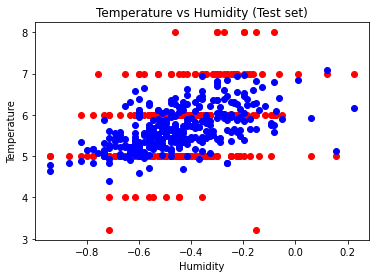

In [32]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что полиномиальная регрессия описывает модель не лучше чем многофакторная, точность модели не удовлетворительное. Данный вид регрессии не может более точно описывать данный датасет.
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [33]:
# Импортируем наши  подгтовленные данные для построения нейронной сети.
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('kr_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [34]:
# Загружаем наши данные для построения нейронной сети.
import pickle
input = open('kr_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [35]:
# Проводим шкалирование.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [36]:
# Подключаем необходимые библиотеки.
import keras
from keras.models import Sequential
from keras.layers import Dense


In [37]:
# Создаём сеть RNN, она будет последовательной. На первом и втором слое берем тангенс для повышенной точности. Для последнего слоя используем линейную функцию активации. 
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 10, activation = 'tanh', input_dim = 5))

# Adding the second hidden layer
rnn.add(Dense(units = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [38]:
# Обучаем нашу нейронную сеть.
rnn.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
128/128 [==============================] - 0s 753us/step - loss: 0.7583 - accuracy: 0.0000e+00
Epoch 2/100
128/128 [==============================] - 0s 470us/step - loss: 0.6709 - accuracy: 0.0000e+00
Epoch 3/100
128/128 [==============================] - 0s 438us/step - loss: 0.6636 - accuracy: 0.0000e+00
Epoch 4/100
128/128 [==============================] - 0s 439us/step - loss: 0.6560 - accuracy: 0.0000e+00
Epoch 5/100
128/128 [==============================] - 0s 428us/step - loss: 0.6501 - accuracy: 0.0000e+00
Epoch 6/100
128/128 [==============================] - 0s 517us/step - loss: 0.6461 - accuracy: 0.0000e+00
Epoch 7/100
128/128 [==============================] - 0s 430us/step - loss: 0.6399 - accuracy: 0.0000e+00
Epoch 8/100
128/128 [==============================] - 0s 421us/step - loss: 0.6364 - accuracy: 0.0000e+00
Epoch 9/100
128/128 [==============================] - 0s 429us/step - loss: 0.6303 - accuracy: 0.0000e+00
Epoch 10/100
128/128 [===============

128/128 [==============================] - 0s 537us/step - loss: 0.5662 - accuracy: 0.0000e+00
Epoch 75/100
128/128 [==============================] - 0s 465us/step - loss: 0.5668 - accuracy: 0.0000e+00
Epoch 76/100
128/128 [==============================] - 0s 457us/step - loss: 0.5651 - accuracy: 0.0000e+00
Epoch 77/100
128/128 [==============================] - 0s 471us/step - loss: 0.5663 - accuracy: 0.0000e+00
Epoch 78/100
128/128 [==============================] - 0s 604us/step - loss: 0.5616 - accuracy: 0.0000e+00
Epoch 79/100
128/128 [==============================] - 0s 449us/step - loss: 0.5666 - accuracy: 0.0000e+00
Epoch 80/100
128/128 [==============================] - 0s 455us/step - loss: 0.5624 - accuracy: 0.0000e+00
Epoch 81/100
128/128 [==============================] - 0s 520us/step - loss: 0.5625 - accuracy: 0.0000e+00
Epoch 82/100
128/128 [==============================] - 0s 474us/step - loss: 0.5665 - accuracy: 0.0000e+00
Epoch 83/100
128/128 [===================

In [39]:
# Строим прогноз.
y_pred = rnn.predict(X_test)

In [40]:
# Проводим обратное шкалирование
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [41]:
# Расчитываем среднеквадратическую ошибку. 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

0.4342642276526282

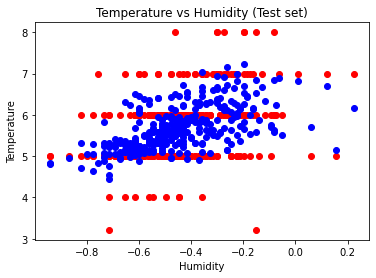

In [42]:
# Визуализируем нашу полученную модель. Как мы видим, что данная нейронная сеть не дала более точно результата для нашего датасета.
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], y_hat, 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [43]:
# Подводя итоги данной работы следует отметить следующее. Датасет был использован в построении различных видах регресии и так же нейронной сети. Данные виды регресии не смогли точно описать нашу модель и подготовить наши данные для создания более точной нейронной сети. Общая оценка модели неудовдетворительная из-за низкого коэфициента детерминации, среднеквадратической ошибки и других факторов.  